In [1]:
import pandas as pd

# 자료요약

## 자료 요약 (1) - 최솟값, 최댓값, 합, 평균 중위수, 개수

read data - titanic.csv
* http://youngho.iwinv.net/data/titanic.csv

In [2]:
data_file = 'http://youngho.iwinv.net/data/titanic.csv'
data_raw = pd.read_csv(data_file)
data_raw

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


In [3]:
### 최솟값
data_raw['age'].min()
data_raw.age.min()

0.16670000599999998

In [4]:
### 최댓값
data_raw.age.max()

80.0

In [5]:
### 합
data_raw.age.sum()

31255.666700006

In [6]:
### 평균
data_raw.age.mean()

29.881134512434034

In [7]:
### 중위수, 중앙값, 제2사분위수
data_raw.age.median()

28.0

In [8]:
### 개수
data_raw.age.count()

1046

In [9]:
### 수치형 자료 요약
data_raw_desc = data_raw.describe()
data_raw_desc

,Unnamed: 0,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,655.000000,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.486055,14.413500,1.041658,0.865560,51.758669,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,328.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,982.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329224,328.000000


In [10]:
data_raw_desc.loc['mean', 'age']

29.881134512434034

## 자료 요약 (2) - pandas.groupby()
* 행의 값에 따른 그룹별 요약

In [11]:
## 성별 나이의 평균
data_group = data_raw.groupby('sex')
data_group['age'].mean()
data_group.age.mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [12]:
### 성별 생존자의 수(비율 = sum()/count() = mean())
data_group.survived.sum()

sex
female    339
male      161
Name: survived, dtype: int64

In [13]:
### 성별 $ 등급의 생존 비율
cols = ['sex', 'pclass']
data_group = data_raw.groupby(cols)
data_group.survived.mean()

sex     pclass
female  1st       0.965278
        2nd       0.886792
        3rd       0.490741
male    1st       0.340782
        2nd       0.146199
        3rd       0.152130
Name: survived, dtype: float64

# 재구조화

## 데이터 재구조화(reshape) - pandas.melt()

In [14]:
data_file = 'http://youngho.iwinv.net/data/power_station.xlsx'
data_excel = pd.ExcelFile(data_file)
data_excel.sheet_names

['2014년', '2015년', '2016년', '2017년', '2018년']

In [15]:
data_2018  = data_excel.parse('2018년')
data_2018

,날짜,발전기명,발전기코드,발전/펌핑구분,01시,02시,03시,04시,05시,06시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
0,2018-01-01,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,700920,350064,78768,8712,0,0,0,0,0,0
1,2018-01-02,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,518616,227016,64296,13752,0,0,0,0,0,0
2,2018-01-03,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,349560,252504,47736,10008,0,0,0,0,0,0
3,2018-01-04,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,324792,118152,40824,0,0,0,0,0,0,0
4,2018-01-05,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,115920,57816,12816,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,245808,110952,27576,0,0,0,0,0,0,0
361,2018-12-28,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,243000,165240,55440,0,0,0,0,0,0,0
362,2018-12-29,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,707112,342216,56232,7776,0,0,0,0,0,0
363,2018-12-30,농촌공진도태양광,9389,10,0,0,0,0,0,0,...,650016,220752,86904,0,0,0,0,0,0,0


In [16]:
data_2018.columns
id_vars = data_2018.columns[0]
var_names = data_2018.columns[4:]
data_melt = pd.melt(data_2018, id_vars, var_names)
data_melt

,날짜,variable,value
0,2018-01-01,01시,0
1,2018-01-02,01시,0
2,2018-01-03,01시,0
3,2018-01-04,01시,0
4,2018-01-05,01시,0
...,...,...,...
8755,2018-12-27,24시,0
8756,2018-12-28,24시,0
8757,2018-12-29,24시,0
8758,2018-12-30,24시,0


In [17]:
### 데이터프레임 정렬
by_values = ['날짜','variable']
data_melt.sort_values(by_values, inplace=True) # data_melt = data_melt~~
data_melt

,날짜,variable,value
0,2018-01-01,01시,0
365,2018-01-01,02시,0
730,2018-01-01,03시,0
1095,2018-01-01,04시,0
1460,2018-01-01,05시,0
...,...,...,...
7299,2018-12-31,20시,0
7664,2018-12-31,21시,0
8029,2018-12-31,22시,0
8394,2018-12-31,23시,0


In [18]:
import matplotlib.pyplot as plt

In [19]:
### Row index 수정
ts_index = pd.date_range(start='2018-01-01 01:00:00', end='2019-01-01 00:00:00', freq='1H')
data_melt.index = ts_index
data_melt

,날짜,variable,value
2018-01-01 01:00:00,2018-01-01,01시,0
2018-01-01 02:00:00,2018-01-01,02시,0
2018-01-01 03:00:00,2018-01-01,03시,0
2018-01-01 04:00:00,2018-01-01,04시,0
2018-01-01 05:00:00,2018-01-01,05시,0
...,...,...,...
2018-12-31 20:00:00,2018-12-31,20시,0
2018-12-31 21:00:00,2018-12-31,21시,0
2018-12-31 22:00:00,2018-12-31,22시,0
2018-12-31 23:00:00,2018-12-31,23시,0


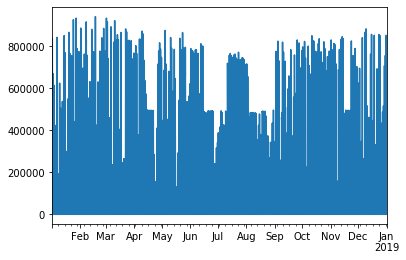

In [20]:
data_melt.value.plot()

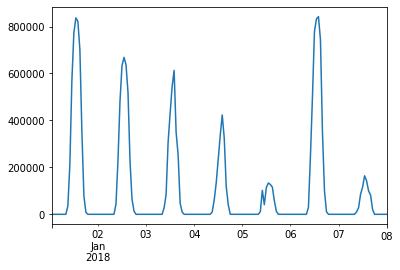

In [21]:
data_melt.value[0:24*7].plot()

## ▣ 문제
* 일별 발전량 (시간별 합)

In [22]:
data_group = data_melt.groupby('날짜')
data_day_sum = data_group.sum()
data_day_sum

,value
날짜,
2018-01-01,4389264
2018-01-02,3519504
2018-01-03,2664360
2018-01-04,1684512
2018-01-05,715824
...,...
2018-12-27,1820952
2018-12-28,1896912
2018-12-29,2939904


In [23]:
### 한글깨짐 보정
plt.rc('font', family='malgun')
%matplotlib inline
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline

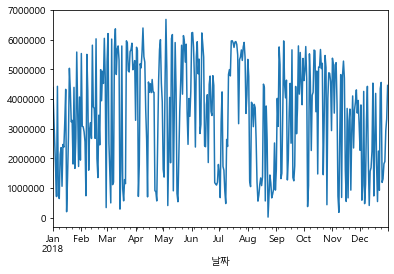

In [24]:
data_day_sum.value.plot()